#Import Libraries

In [224]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.image as mpimg
from sklearn.preprocessing import RobustScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [151]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [152]:
%cd /content/drive/MyDrive/Data Science Portfolio/Data Science for Business/Housing

/content/drive/MyDrive/Data Science Portfolio/Data Science for Business/Housing


#Import Data

In [153]:
df = pd.read_csv("/content/drive/MyDrive/Data Science Portfolio/Data Science for Business/Housing/housing.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


**Features:**

* **longitude:**  geographic coordinate (district´s east-west position)
* **latitude:**  geographic coordinate (district´s north-south position)
* **housing_median_age:** median age of houses in district
* **total_rooms** Sum of all rooms in district
* **total_bedrooms** Sum of all bedrooms in district
* **population:** total population in district
* **households:** total households in district
* **median_income:** median household income in district
* **median_house_value:** median house value in district
* **ocean_proximity:** District´s proximity to the ocean

# EDA

In [154]:
df.info()
# total_bedrooms contain nll values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [155]:
# check null values
df.loc[df["total_bedrooms"].isna()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [156]:
df.duplicated().sum()

0

In [157]:
df.describe()
# average housing edian age is 28 years, population is 3 persons,average housevalue is 206855

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [158]:
df.describe(include = 'O')

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


In [159]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

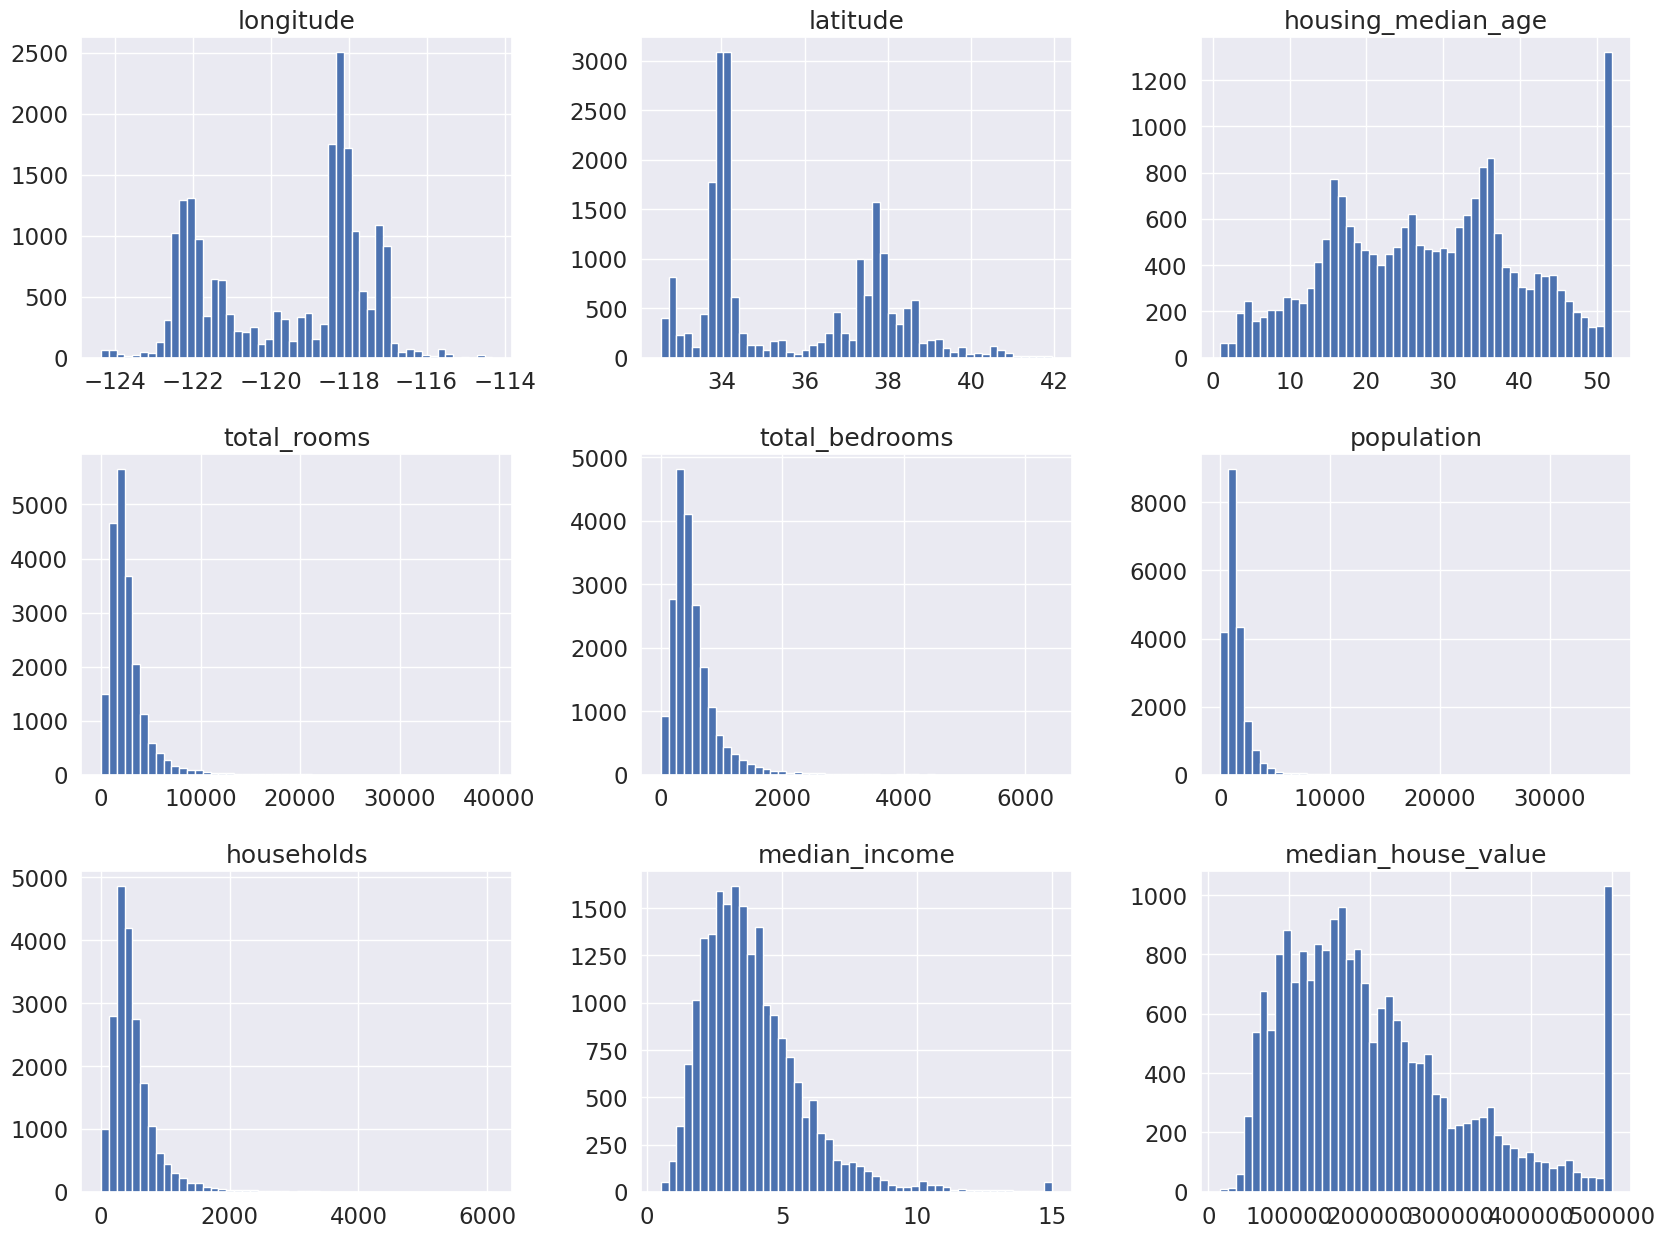

In [160]:
df.hist(bins = 50, figsize = (20,15))
plt.show()

In [161]:
# drop nan values in dataframe
df.dropna(inplace= True)

create column for number of rooms per house


In [162]:
df["rooms_per_household"] = df["total_rooms"].div(df["households"])

In [163]:
# top 10 records by number of rooms per household
df["rooms_per_household"].nlargest(10)

1914     141.909091
1979     132.533333
12447     62.422222
1913      61.812500
11862     59.875000
1912      56.269231
9676      52.848214
11707     52.690476
2395      50.837838
1240      47.515152
Name: rooms_per_household, dtype: float64

In [164]:
# smallest 10 records by number of rooms per household
df["rooms_per_household"].nsmallest(10)

5916     0.846154
8219     0.888889
3126     1.000000
14818    1.130435
17820    1.130435
4552     1.260870
4550     1.378486
4587     1.411290
4602     1.465753
12484    1.550409
Name: rooms_per_household, dtype: float64

In [165]:
# check households with number of rooms smaller than 1 & more than 100
df.loc[[1914, 1979, 5916, 8219]]
# looks that the number of rooms doesn't make sense

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household
1914,-120.10,38.91,33.0,1561.0,282.0,30.0,11.0,1.8750,500001.0,INLAND,141.909091
1979,-120.08,38.80,34.0,1988.0,511.0,36.0,15.0,4.6250,162500.0,INLAND,132.533333
5916,-118.44,34.28,46.0,11.0,11.0,24.0,13.0,2.8750,162500.0,<1H OCEAN,0.846154
8219,-118.21,33.79,33.0,32.0,18.0,96.0,36.0,4.5938,112500.0,NEAR OCEAN,0.888889


create population per household column

In [166]:
df["pop_per_household"] = df["population"].div(df["households"])

create bedrooms per room column

In [167]:
df["bedrooms_per_room"] = df["total_bedrooms"].div(df["total_rooms"])

In [168]:
df.describe()
# on average we have 3 persons per household, 0.2 bedrooms per room

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,pop_per_household,bedrooms_per_room
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,5.431344,3.071533,0.213039
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,2.482946,10.438269,0.057983
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.692308,0.100000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,4.441441,2.429032,0.175427
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,5.230769,2.817582,0.203162
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,6.052381,3.281513,0.239821
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1243.333333,1.000000


#What Factors Influence House Prices

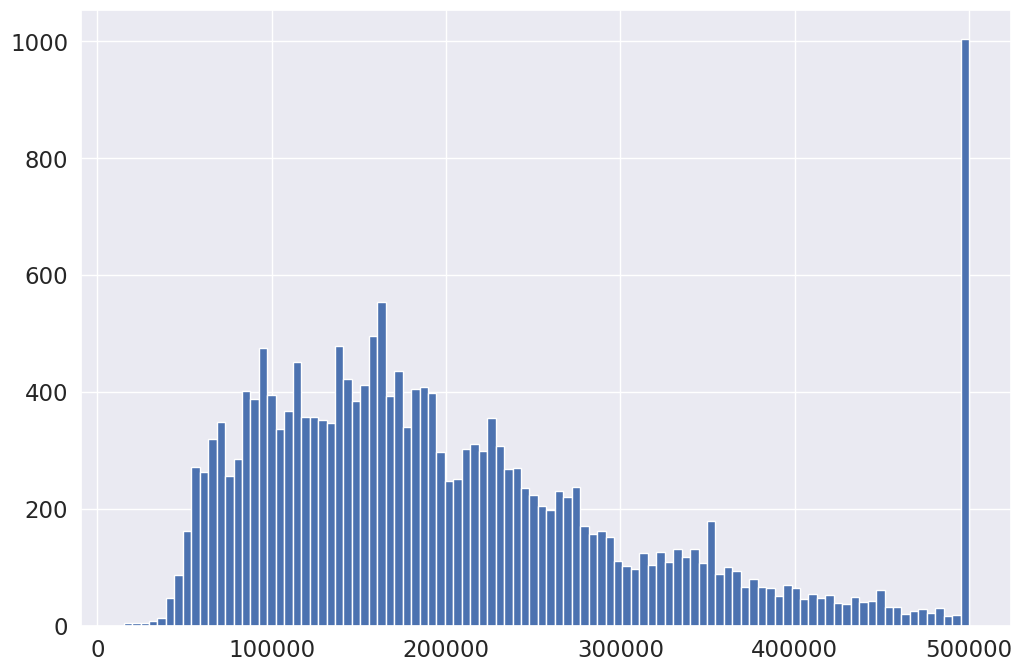

In [169]:
# plot median house value histogram
df["median_house_value"].hist(bins =100, figsize =(12,8))
plt.show()

In [170]:
# check liner relationship between median house value and rest of features
df.corr()["median_house_value"].sort_values(ascending = False)
# there is clearly positive correlation between median house value & median income

<ipython-input-170-2b99ebe925b0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["median_house_value"].sort_values(ascending = False)


median_house_value     1.000000
median_income          0.688355
rooms_per_household    0.151344
total_rooms            0.133294
housing_median_age     0.106432
households             0.064894
total_bedrooms         0.049686
pop_per_household     -0.023639
population            -0.025300
longitude             -0.045398
latitude              -0.144638
bedrooms_per_room     -0.255880
Name: median_house_value, dtype: float64

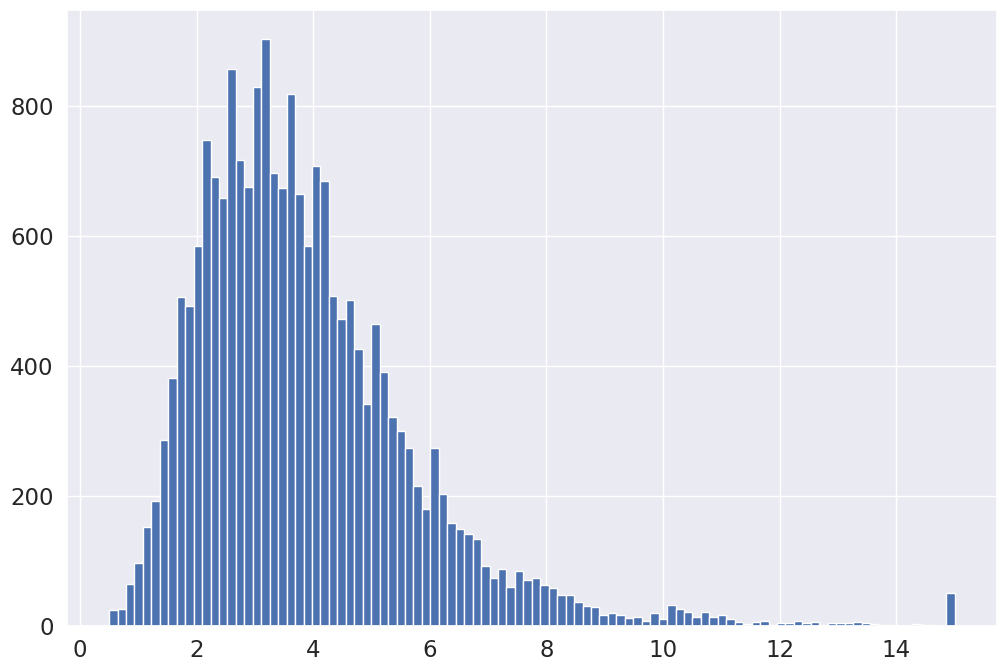

In [171]:
# plot median income histogram
df["median_income"].hist(bins =100, figsize =(12,8))
plt.show()

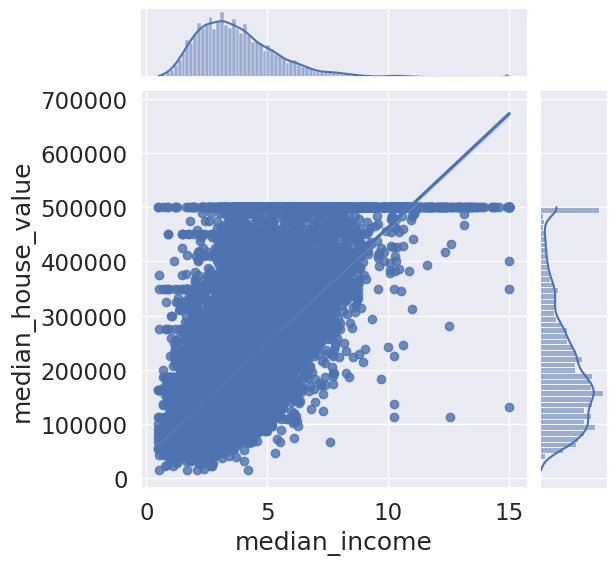

In [172]:
# regression plot of median income & median_house_value
sns.jointplot(data = df, x= 'median_income', y= 'median_house_value', kind = "reg" )

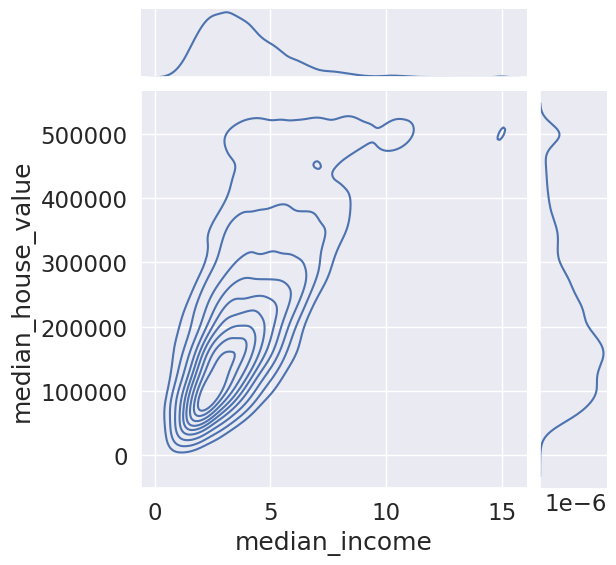

In [173]:
# kde plot of  median income & median_house_value
sns.jointplot(data = df, x= 'median_income', y= 'median_house_value', kind = "kde" )
# most common values at median income = 2 and median house value = 100k

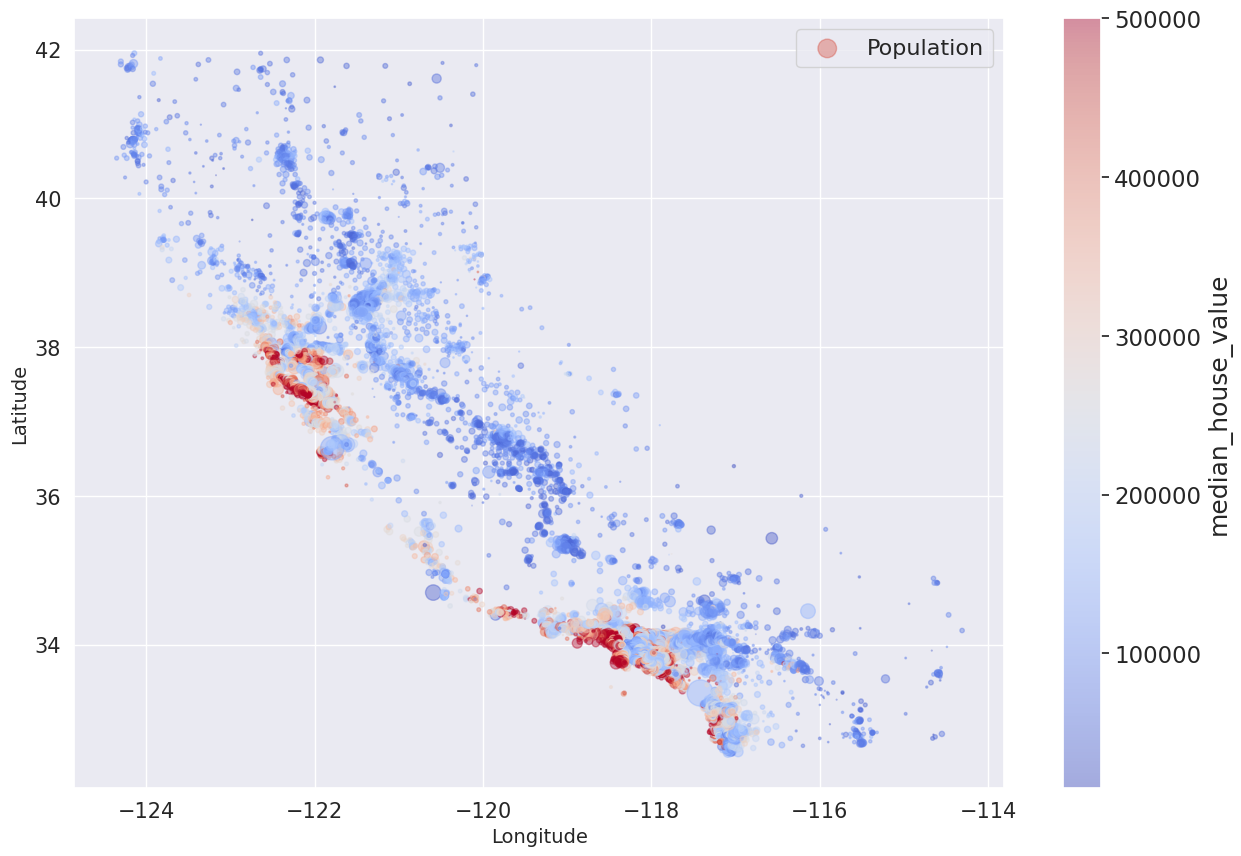

In [174]:
df.plot(kind="scatter", x="longitude", y="latitude",
                       s=df["population"]/100, label="Population", figsize = (15, 10),
                       c="median_house_value", cmap= "coolwarm",
                       colorbar=True, alpha=0.4, fontsize = 15)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend(fontsize=16)
plt.show()
# the darker red the higher median house value, the bigger the size the more populated

In [175]:
california_img = mpimg.imread("california.png")

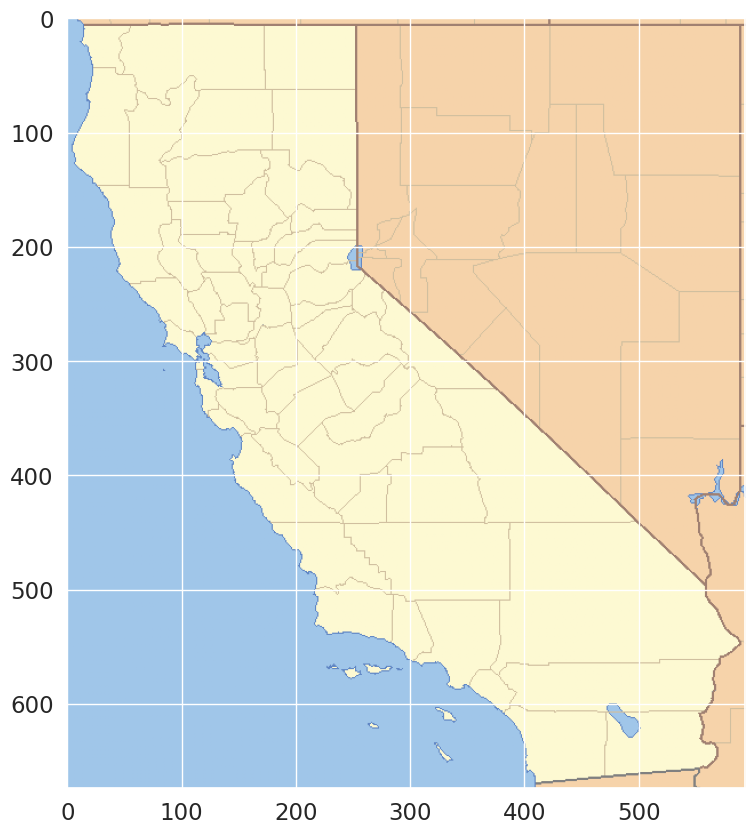

In [176]:
plt.figure(figsize = (15, 10))
plt.imshow(california_img)
plt.show()

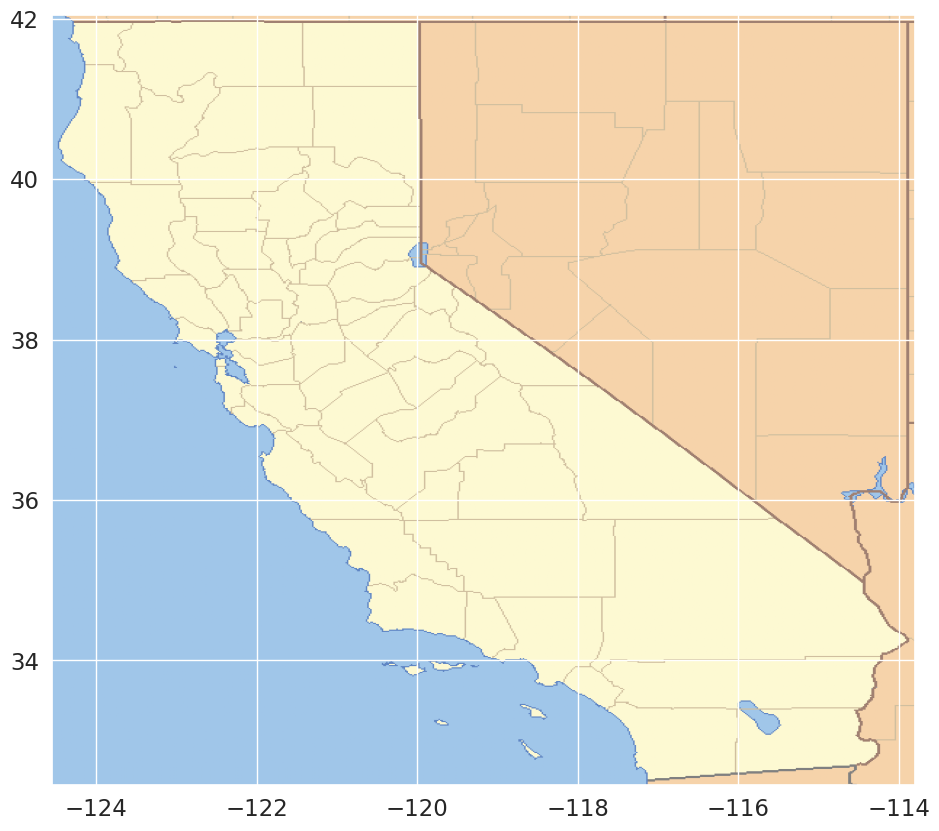

In [177]:
# adjusting coordinates for california
plt.figure(figsize = (15, 10))
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05])
plt.show()

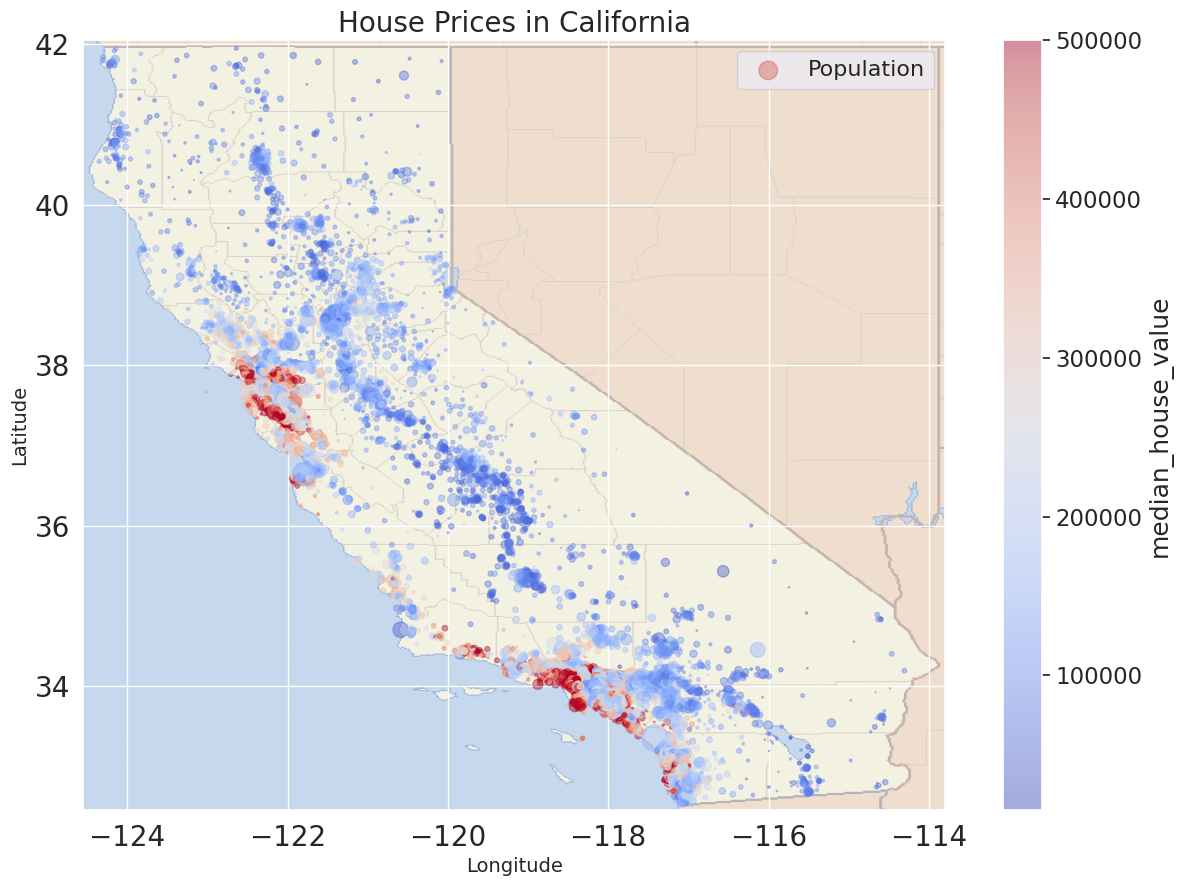

In [178]:
# combining the map with the data points
df.plot(kind="scatter", x="longitude", y="latitude",
                       s=df.population/100, label="Population", figsize = (15, 10),
                       c="median_house_value", cmap="coolwarm",
                       colorbar=True, alpha=0.4, fontsize = 20)

plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)

plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.title("House Prices in California", fontsize = 20)
plt.legend(fontsize=16)
plt.show()

In [179]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [180]:
prox = df["ocean_proximity"].unique()
prox

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [181]:
df_loc = df[df["ocean_proximity"]=="NEAR OCEAN"]

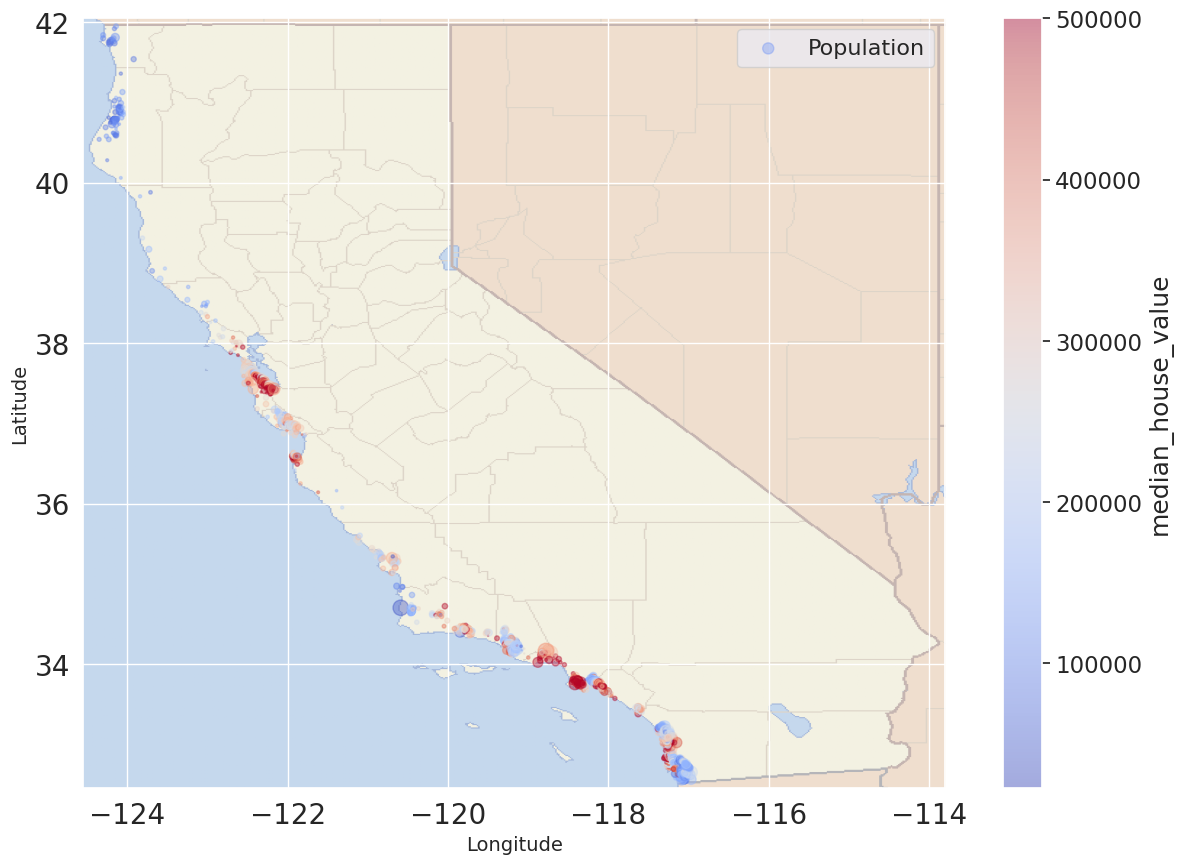

In [182]:
df_loc.plot(kind="scatter", x="longitude", y="latitude",
                       s=df_loc['population']/100, label="Population", figsize = (15, 10),
                       c="median_house_value", cmap="coolwarm",
                       colorbar=True, alpha=0.4, fontsize = 20, sharex = False
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))

plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend(fontsize=16)
plt.show()

In [183]:
df_loc = df[df["ocean_proximity"]=="INLAND"]

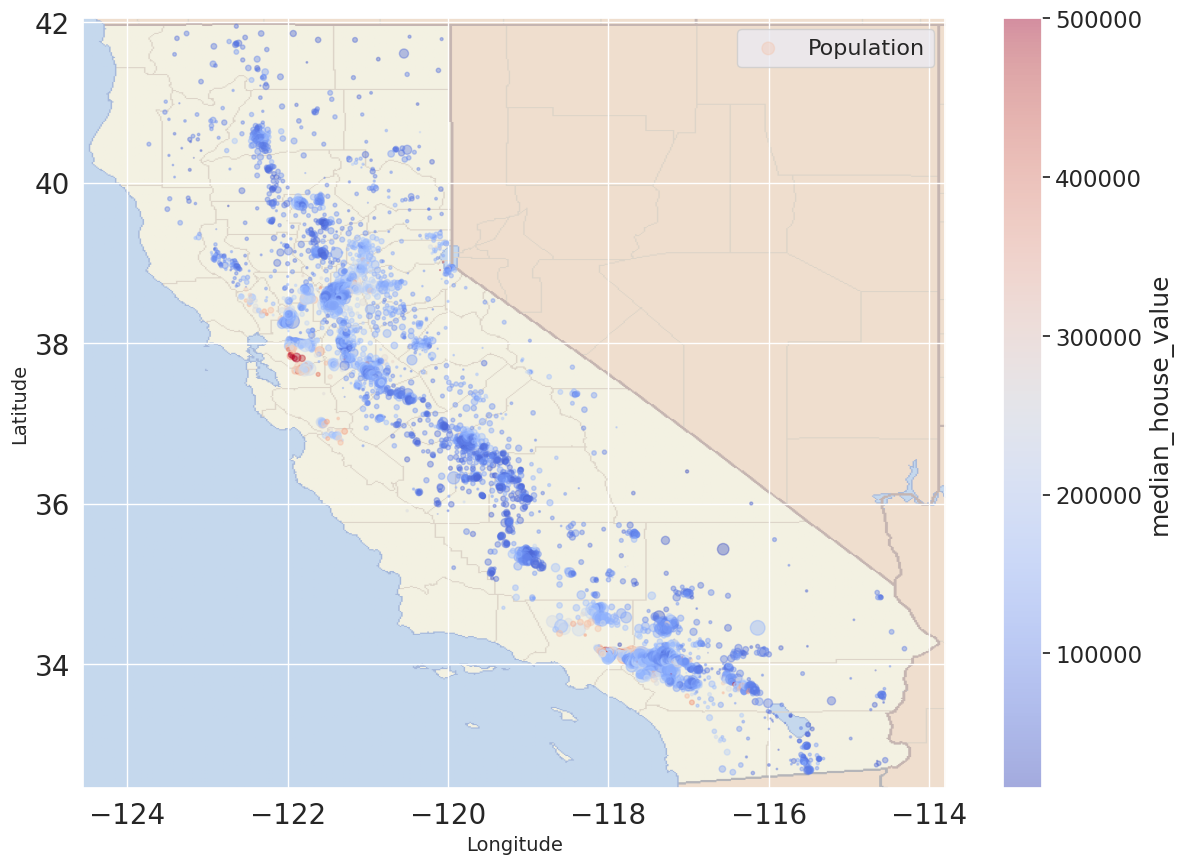

In [184]:
df_loc.plot(kind="scatter", x="longitude", y="latitude",
                       s=df_loc['population']/100, label="Population", figsize = (15, 10),
                       c="median_house_value", cmap="coolwarm",
                       colorbar=True, alpha=0.4, fontsize = 20, sharex = False
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))

plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend(fontsize=16)
plt.show()

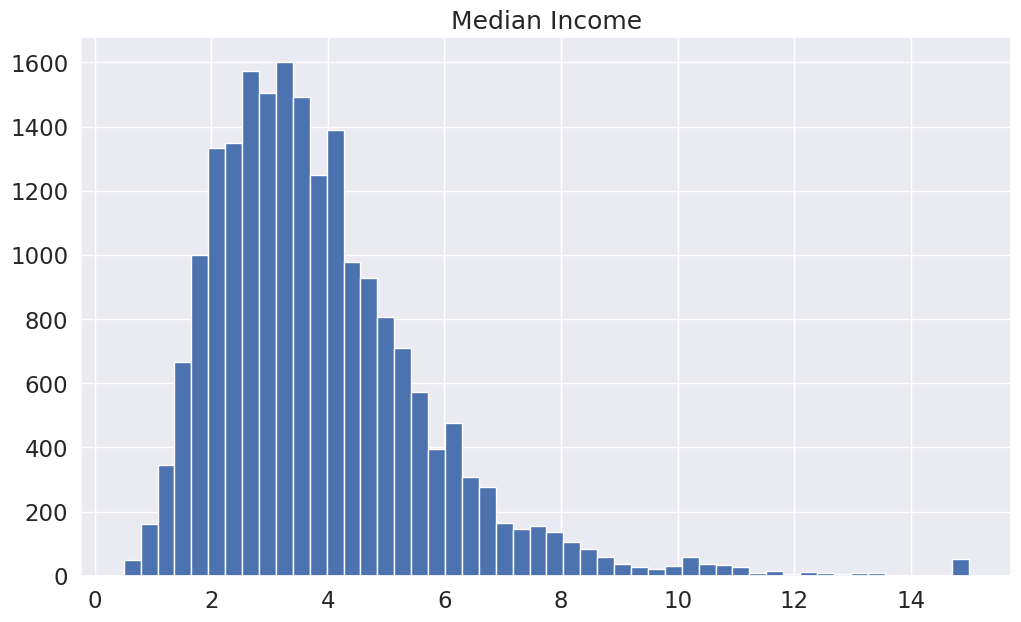

In [185]:
df["median_income"].hist(bins = 50, figsize = (12, 7))
plt.title("Median Income")
plt.show()

In [186]:
# create new column to categorize median income
df["income_cat"] = pd.qcut(df["median_income"], q= [0, 0.25, 0.5, 0.75, 0.95, 1], labels = ["Low", "Below Average", "Above_Average", "High", "Very High"])

In [187]:
df["income_cat"].value_counts()

Low              5109
Above_Average    5109
Below Average    5108
High             4085
Very High        1022
Name: income_cat, dtype: int64

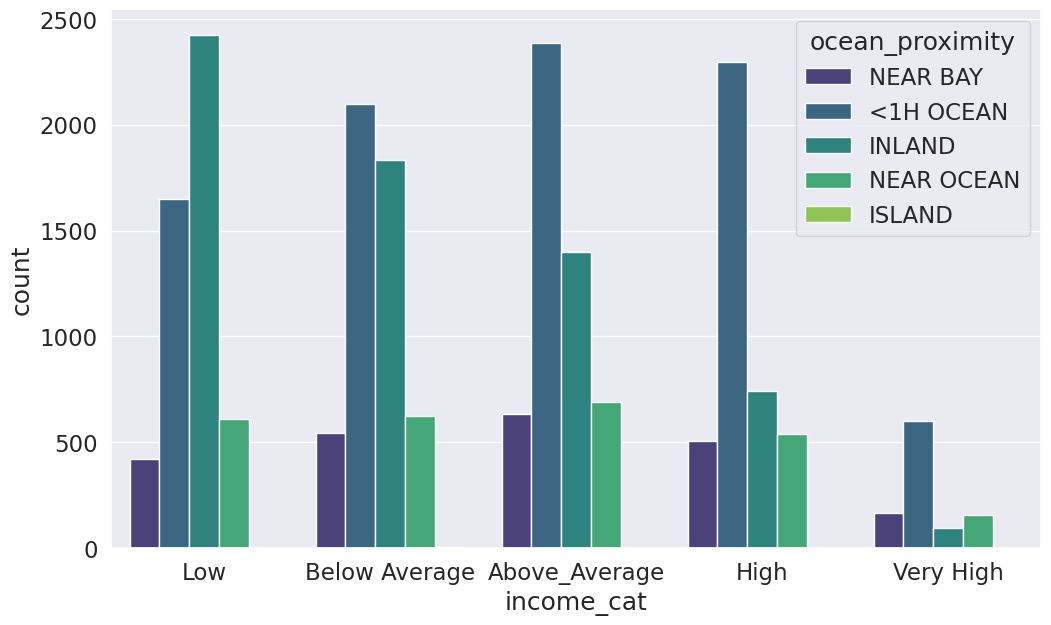

In [188]:
plt.figure(figsize = (12,7))
sns.countplot(data = df, x = "income_cat", hue = "ocean_proximity", palette= "viridis")
plt.show()

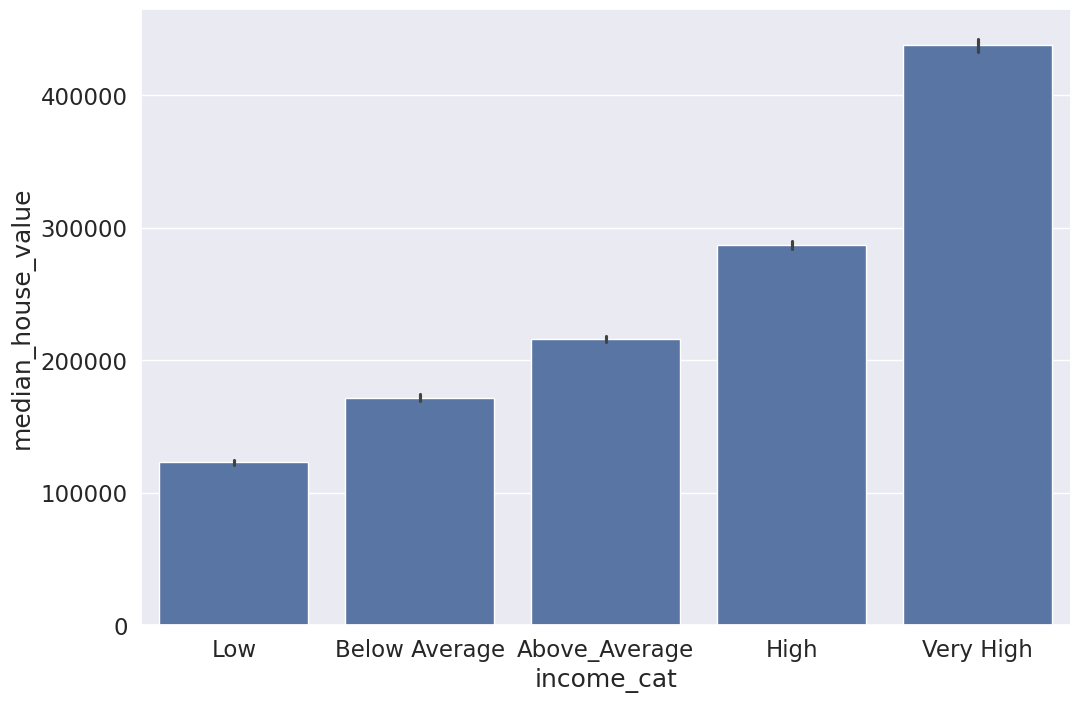

In [189]:
plt.figure(figsize=(12,8))
sns.barplot(data = df, x = "income_cat", y = "median_house_value")
plt.show()
# district with high median income has around 450,000 median house value
# district with low median income has around 120,000 median house value

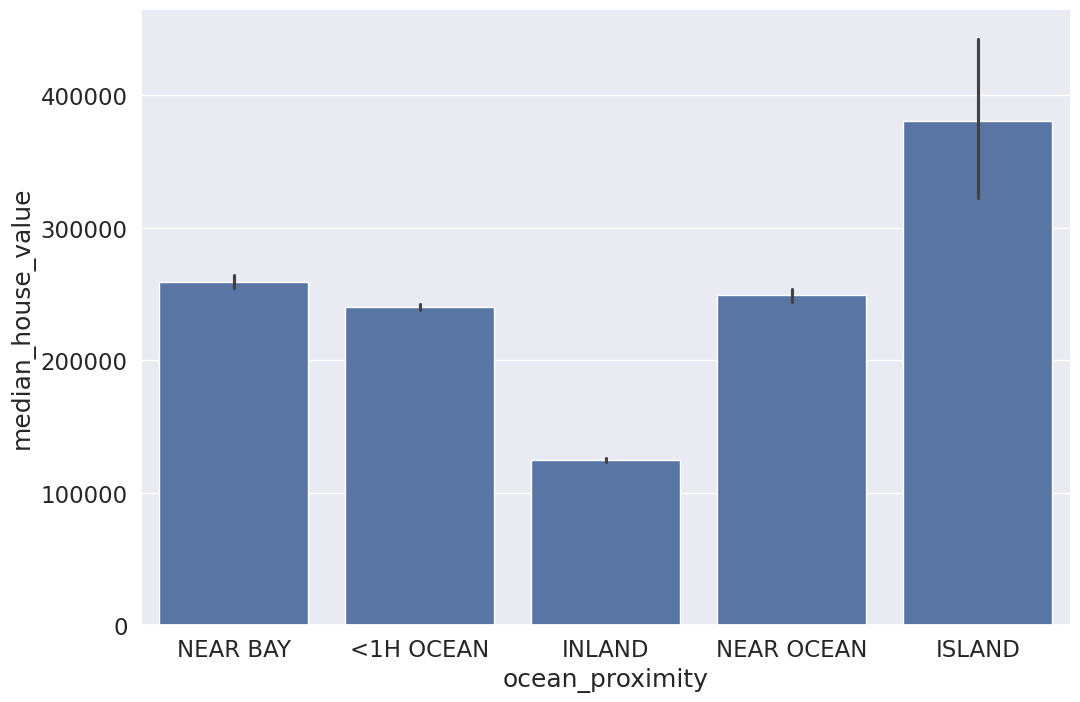

In [190]:
plt.figure(figsize=(12,8))
sns.barplot(data = df, x = "ocean_proximity", y = "median_house_value")
plt.show()
# will ignore the island because theyr are only  records
# the cheapest is the inland districts and the rest is kinda close to each other

In [191]:
matrix = df.groupby(["income_cat", "ocean_proximity"]).median_house_value.mean().unstack().drop(columns = ["ISLAND"])
matrix

ocean_proximity,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
income_cat,,,,
Low,161337.076923,84820.626650,155122.052133,148027.826514
Below Average,197236.013829,115124.088283,220196.177656,208665.190096
Above_Average,232278.358759,147846.891351,261965.251582,255293.813584
High,292208.766217,208095.566622,322566.033663,337446.227778
Very High,439784.235489,347571.736842,451015.078788,468739.723270


<Axes: xlabel='ocean_proximity', ylabel='income_cat'>

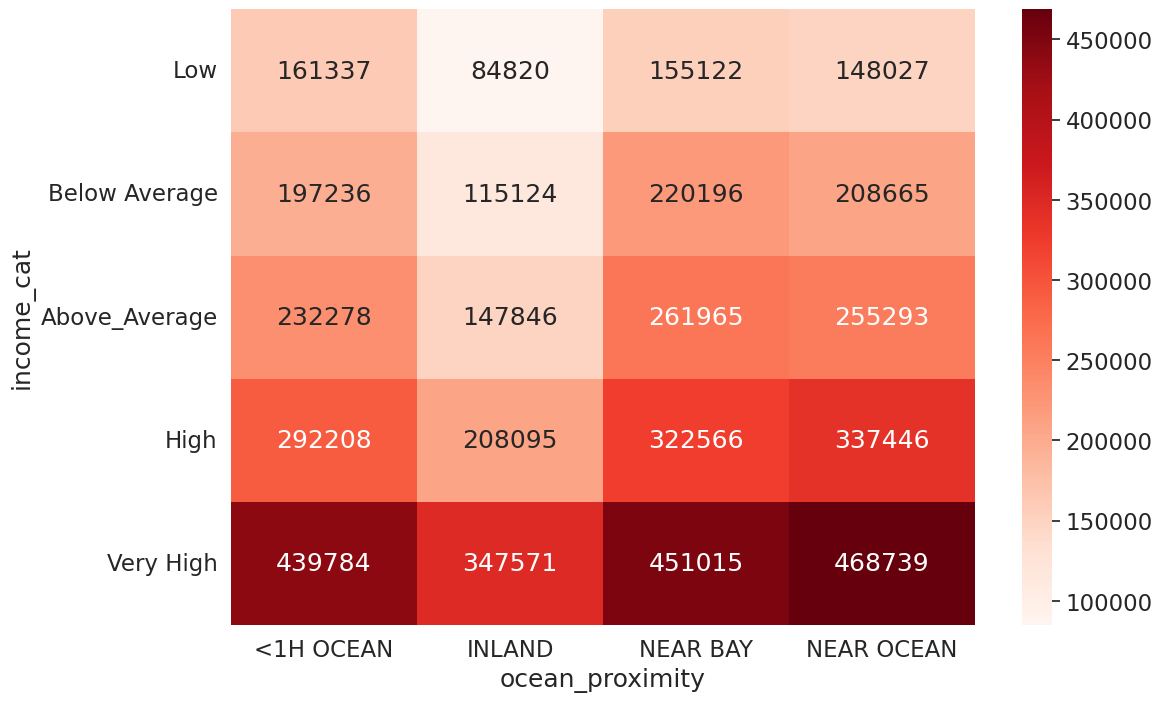

In [192]:
plt.figure(figsize = (12,8))
sns.set(font_scale =1.5)
sns.heatmap(matrix.astype("int"), annot = True,cmap = 'Reds', fmt="d")
# the highest mean house values in combination of near ocean, very high income cat
# the lowest mean house values in combination of inland, low income cat

#Feature Engineering

In [193]:
label = df["median_house_value"]

In [194]:
features = df.drop(columns = ["median_house_value", "income_cat"])

In [195]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   longitude            20433 non-null  float64
 1   latitude             20433 non-null  float64
 2   housing_median_age   20433 non-null  float64
 3   total_rooms          20433 non-null  float64
 4   total_bedrooms       20433 non-null  float64
 5   population           20433 non-null  float64
 6   households           20433 non-null  float64
 7   median_income        20433 non-null  float64
 8   ocean_proximity      20433 non-null  object 
 9   rooms_per_household  20433 non-null  float64
 10  pop_per_household    20433 non-null  float64
 11  bedrooms_per_room    20433 non-null  float64
dtypes: float64(11), object(1)
memory usage: 2.5+ MB


In [196]:
numerical_cols = features.select_dtypes(include=['float64']).columns
categorical_cols = ["ocean_proximity"]  # categorical column to be one-hot encoded

In [197]:
# scale numerical columns
scaler = RobustScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [198]:
encoder = OneHotEncoder(sparse_output = False, drop = 'first')
onehot_encoded = encoder.fit_transform(df[categorical_cols])

In [200]:
transformed_data = pd.concat([
    pd.DataFrame(onehot_encoded, columns=encoder.get_feature_names_out(categorical_cols)).reset_index(drop=True),
    df[numerical_cols].reset_index(drop=True)], axis=1)
transformed_data

,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,pop_per_household,bedrooms_per_room
0,0.0,0.0,1.0,0.0,-0.986807,0.955145,0.631579,-0.736562,-0.871795,-0.902674,-0.873457,2.196349,1.088407,-0.307370,-0.878531
1,0.0,0.0,1.0,0.0,-0.984169,0.949868,-0.421053,2.936799,1.911681,1.320856,2.250000,2.185433,0.625329,-0.830213,-0.735571
2,0.0,0.0,1.0,0.0,-0.989446,0.947230,1.210526,-0.389841,-0.698006,-0.716578,-0.716049,1.706600,1.897878,-0.017974,-1.143697
3,0.0,0.0,1.0,0.0,-0.992084,0.947230,1.210526,-0.503839,-0.569801,-0.650267,-0.586420,0.966197,0.364124,-0.316297,-0.290466
4,0.0,0.0,1.0,0.0,-0.992084,0.947230,1.210526,-0.295334,-0.441595,-0.642781,-0.462963,0.142045,0.652466,-0.746193,-0.482450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20428,1.0,0.0,0.0,0.0,-0.686016,1.377309,-0.210526,-0.272888,-0.173789,-0.343316,-0.243827,-0.906389,-0.115035,-0.301445,0.333298
20429,1.0,0.0,0.0,0.0,-0.717678,1.379947,-0.578947,-0.844654,-0.811966,-0.866310,-0.910494,-0.449342,0.548292,0.358043,0.187063
20430,1.0,0.0,0.0,0.0,-0.720317,1.364116,-0.631579,0.075015,0.142450,-0.170053,0.074074,-0.842315,-0.015659,-0.577078,0.186519
20431,1.0,0.0,0.0,0.0,-0.746702,1.364116,-0.578947,-0.157708,-0.074074,-0.454545,-0.185185,-0.765629,0.061296,-0.814533,0.259810


# Random Forest Model

In [202]:
X = transformed_data
y= df["median_house_value"]

In [203]:
# split data to train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 47)

In [204]:
# apply random forest regressor
rf = RandomForestRegressor(n_estimators = 500)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500)

In [211]:
y_pred = rf.predict(X_test)

array([ 80120.2  , 128492.   , 430292.59 , ...,  81955.8  , 496240.73 ,
       315173.402])

#Model Evaluation

In [217]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):" ,mse)
print("Root Mean Sqaured Error(RMSE)" , rmse)
print("R-squared (R^2) Score:", r2)

Mean Squared Error (MSE): 2505368861.898498
Root Mean Sqaured Error(RMSE) 50053.65982521656
R-squared (R^2) Score: 0.816072269533133


In [228]:
# create dataframe comparing true labels and the predicted
comp = pd.DataFrame({"True Values": y_test, "Predicted Values": y_test})
comp

,True Values,Predicted Values
12230,109500.0,109500.0
13657,115700.0,115700.0
3535,352800.0,352800.0
3223,54400.0,54400.0
8032,314700.0,314700.0
...,...,...
12165,145300.0,145300.0
6394,437300.0,437300.0
2391,83300.0,83300.0
10743,500001.0,500001.0


#Feature Importance

In [229]:
rf.feature_importances_

array([1.38694733e-01, 1.47148566e-04, 8.12399679e-04, 2.67401258e-03,
       5.95865453e-02, 5.52413976e-02, 4.19742789e-02, 1.28671054e-02,
       1.22686574e-02, 1.24834052e-02, 1.08130666e-02, 4.81818083e-01,
       2.57860108e-02, 1.19998807e-01, 2.48343499e-02])

In [237]:
# create dataframe to store feature importances
feature_imp = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf.feature_importances_}).sort_values(by ="Importance" ,ascending = False)
feature_imp
# median income is the most important feature to determine house values

,Feature,Importance
11,median_income,0.481818
0,ocean_proximity_INLAND,0.138695
13,pop_per_household,0.119999
4,longitude,0.059587
5,latitude,0.055241
6,housing_median_age,0.041974
12,rooms_per_household,0.025786
14,bedrooms_per_room,0.024834
7,total_rooms,0.012867
9,population,0.012483


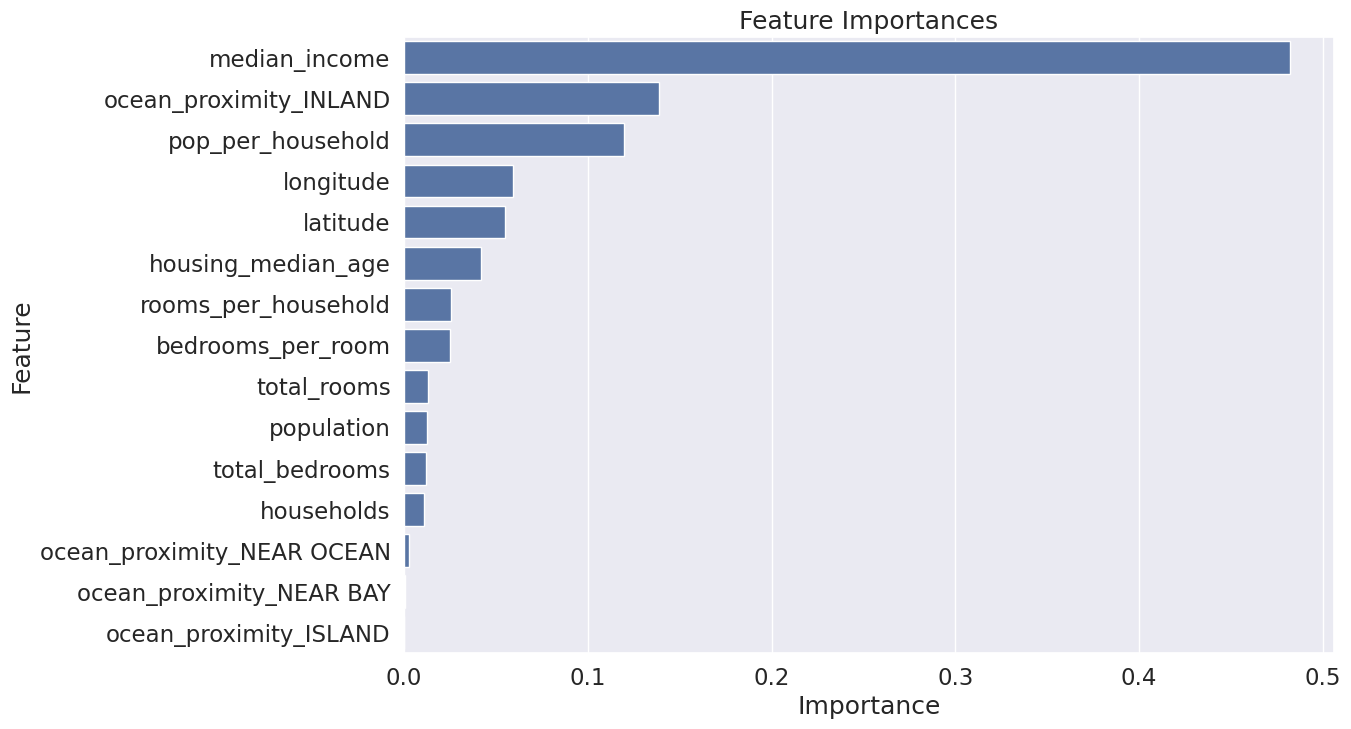

In [241]:
# plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_imp)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()